<a href="https://colab.research.google.com/github/manav616/ADS_EXPS/blob/main/ADS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from statsmodels.tsa.arima_model import ARMA
data=pd.read_csv("candy_production.csv")
data.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [ ]:
print("\nDataFrame info:")
print(data.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  548 non-null    object 
 1   IPG3113N          548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB
None


In [ ]:
print(data.describe())


         IPG3113N
count  548.000000
mean   100.662524
std     18.052931
min     50.668900
25%     87.862475
50%    102.278550
75%    114.691900
max    139.915300


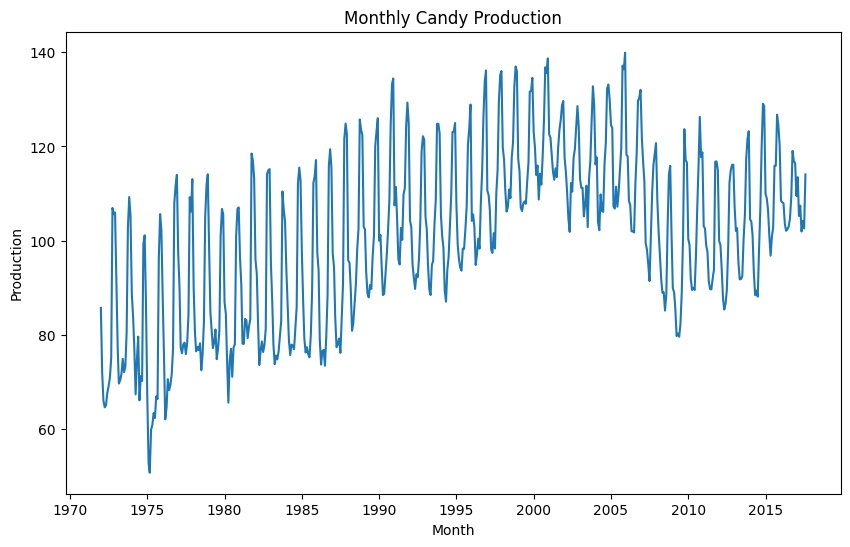

In [ ]:
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.set_index('observation_date', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Monthly Candy Production')
plt.xlabel('Month')
plt.ylabel('Production')
plt.show()

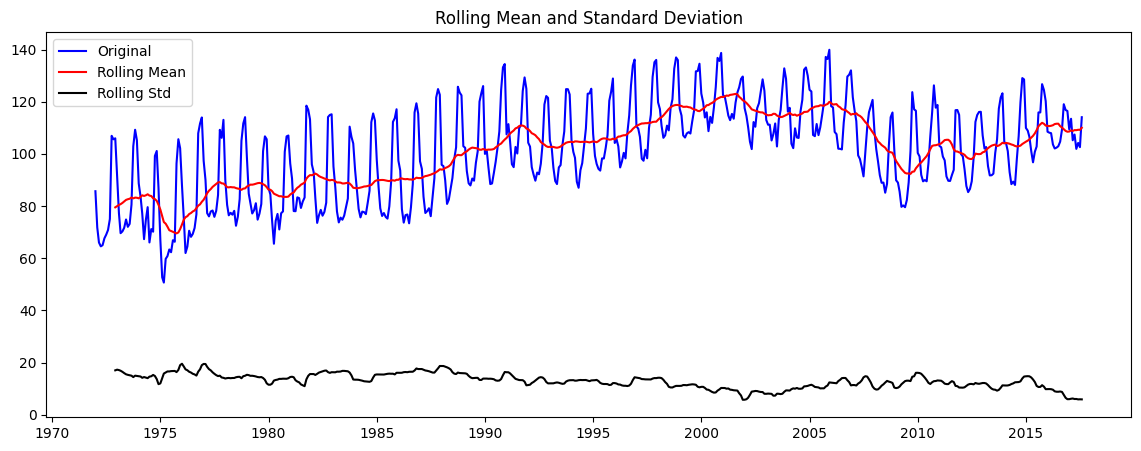

In [ ]:
# Calculate rolling mean and rolling standard deviation
rollmean = data['IPG3113N'].rolling(12).mean()
rollstd = data['IPG3113N'].rolling(12).std()

# Plot rolling statistics
plt.figure(figsize=(14, 5))

# Plot original data
plt.plot(data['IPG3113N'], color='blue', label='Original')

# Plot rolling mean and rolling standard deviation
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

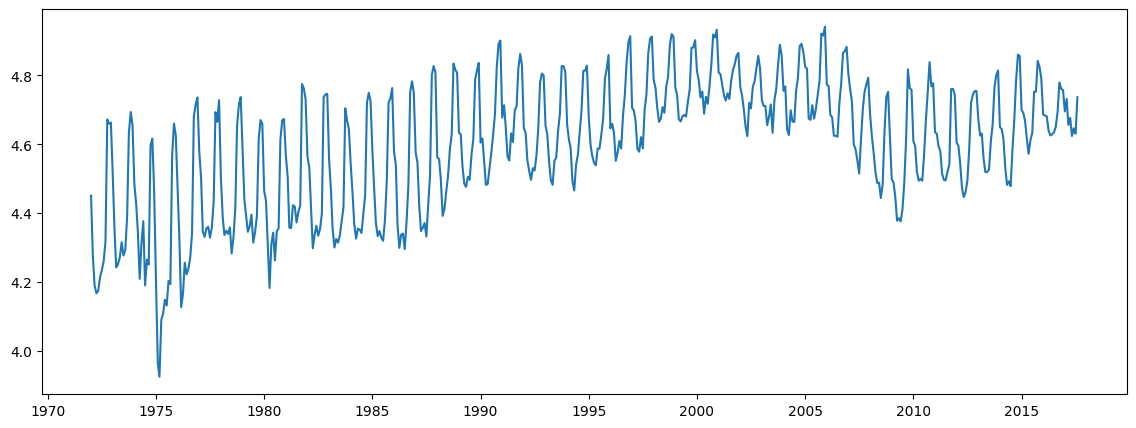

In [ ]:
#make data stationary
plt.figure(figsize=(14,5))
fig=plt.figure(1)

beer_log=np.log(data)
plt.plot(beer_log)

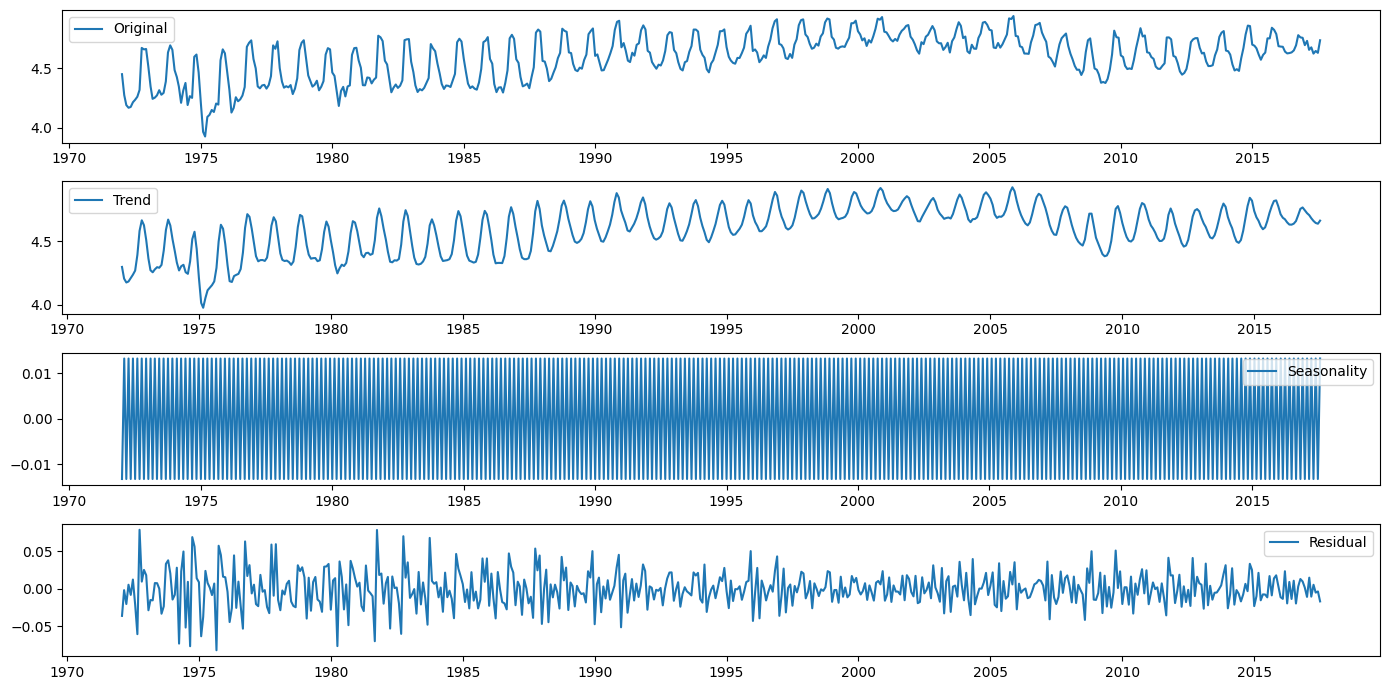

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

candy_log = data['IPG3113N'].apply(np.log)

# Perform decomposition
decomposition = seasonal_decompose(candy_log, period=2)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(14,7))

plt.subplot(411)
plt.plot(candy_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


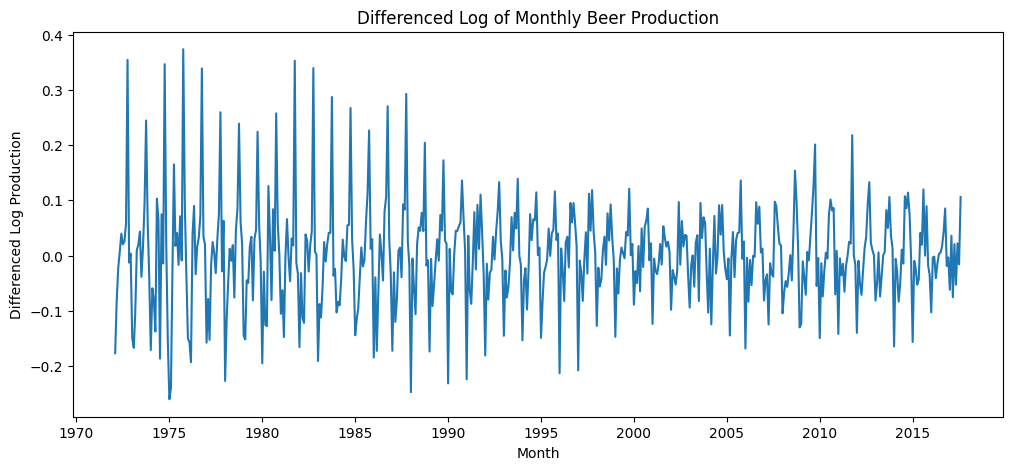

In [ ]:
candy_log = data['IPG3113N'].apply(np.log)

# Perform differencing
candy_log_diff = candy_log - candy_log.shift()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(candy_log_diff)
plt.title('Differenced Log of Monthly Beer Production')
plt.xlabel('Month')
plt.ylabel('Differenced Log Production')
plt.show()

# Calculate rolling mean and rolling standard deviation of the differenced series
rollmean = candy_log_diff.rolling(12).mean()
rollstd = candy_log_diff.rolling(12).std()

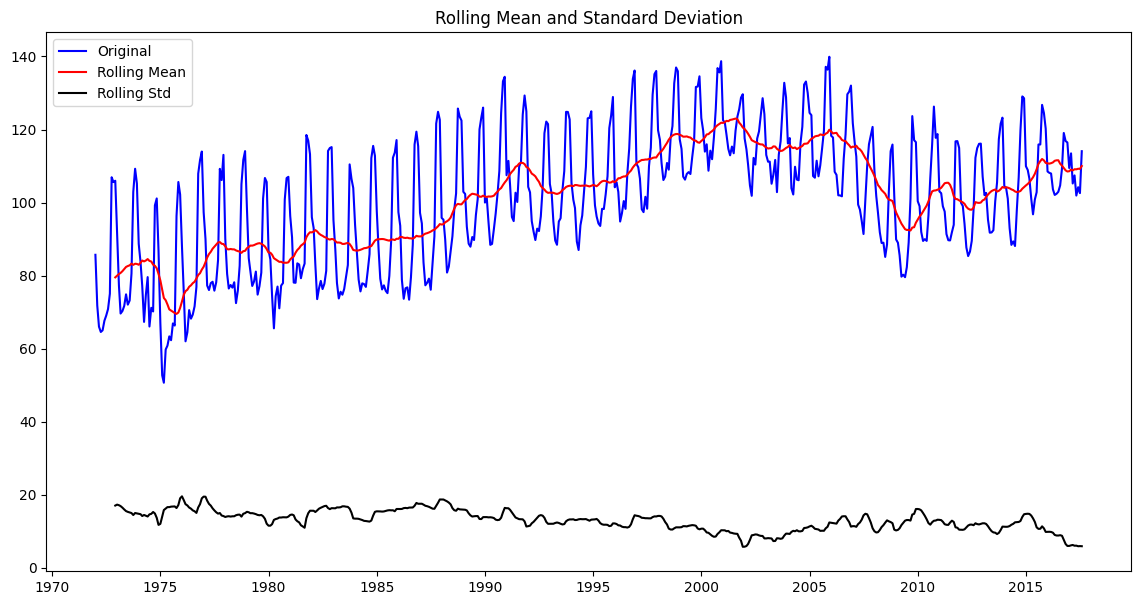

In [ ]:
rollmean = data['IPG3113N'].rolling(12).mean()
rollstd = data['IPG3113N'].rolling(12).std()

# Plot rolling statistics
plt.figure(figsize=(14, 7))
orig = plt.plot(data['IPG3113N'], color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [ ]:
data.sort_index(inplace=True)


In [ ]:
from statsmodels.tsa.stattools import acf,pacf
candy_acf=acf(candy_log_diff,nlags=20)
candy_pacf=pacf(candy_log_diff,nlags=20)


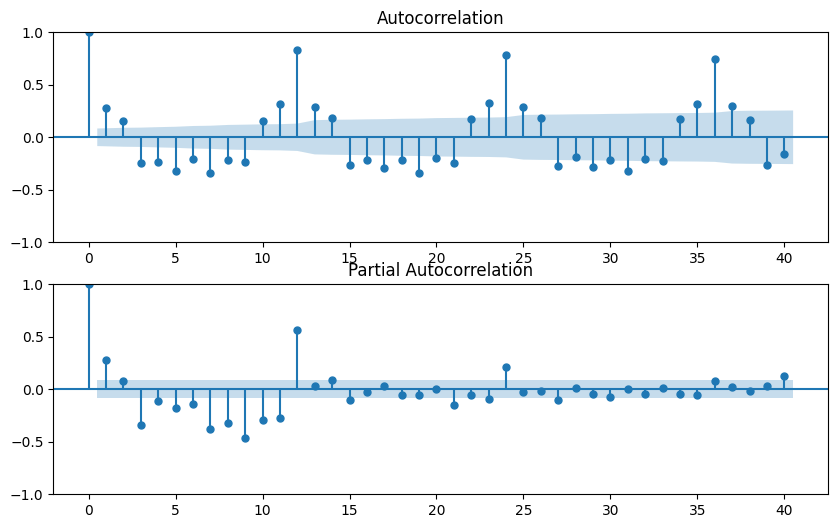

In [ ]:
import statsmodels.api as sm
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(candy_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(candy_log_diff.dropna(),lags=40,ax=ax2)

**AIRMA**

In [ ]:
!pip install pmdarima

import pmdarima as pm
def arimamodel(timeseries):
  automodel=pm.auto_arima(timeseries,start_p=3,start_q=3,max_p=5,max_q=5,test="adf",seasonal=True,trace=True)
  return automodel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
arimamodel(candy_log)


Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1220.348, Time=4.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-274.438, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1100.455, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-708.518, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3229.378, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1213.373, Time=3.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1217.831, Time=2.47 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1224.845, Time=2.21 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1244.651, Time=1.76 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1222.165, Time=1.94 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1316.217, Time=2.13 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1221.985, Time=3.42 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-1210.280, Time=3.29 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-1145.136, Time=1.27 sec

Best model:  ARIMA(5,

ARIMA(order=(5, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(beer_log,order=(0,1,0))
results_ARIMA=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
ARIMA_diff_predictions.head()


observation_date
1972-01-01    0.000000
1972-02-01    4.450789
1972-03-01    4.274163
1972-04-01    4.190002
1972-05-01    4.167665
dtype: float64

In [ ]:
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
ARIMA_diff_predictions_cumsum.head()

observation_date
1972-01-01     0.000000
1972-02-01     4.450789
1972-03-01     8.724952
1972-04-01    12.914953
1972-05-01    17.082618
dtype: float64

In [ ]:
ARIMA_log_prediction=pd.Series(beer_log.iloc[0],index=beer_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

observation_date
1972-01-01     4.450789
1972-02-01     8.901577
1972-03-01    13.175740
1972-04-01    17.365742
1972-05-01    21.533407
dtype: float64

In [ ]:
results_ARIMA.predict(10,30)

1972-11-01    4.672164
1972-12-01    4.659622
1973-01-01    4.663131
1973-02-01    4.514148
1973-03-01    4.347306
1973-04-01    4.242923
1973-05-01    4.252752
1973-06-01    4.272242
1973-07-01    4.315666
1973-08-01    4.277310
1973-09-01    4.292851
1973-10-01    4.389393
1973-11-01    4.633952
1973-12-01    4.693661
1974-01-01    4.656063
1974-02-01    4.485243
1974-03-01    4.426161
1974-04-01    4.346788
1974-05-01    4.209471
1974-06-01    4.312403
1974-07-01    4.376836
Freq: MS, Name: predicted_mean, dtype: float64